# Classification

Lets understand more about classification systems.


In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

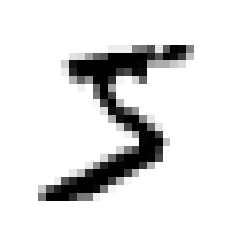

In [22]:
some_digit = X.iloc[0].to_numpy().reshape(28, 28)

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

The MNIST dataset is already divided into training (first 60000 images) and test set (last 10000) and shuffled id. Some algorithms are sensitive to the order of training instances, and perform poorly if they get many similar instances in a row.


In [23]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

## Performance Measures


Evaluating a classifier is often trickier than evaluating a regressor. There are many performance measures available

### - Measuring Accuracy using Cross-Validation

Cross-Validation might present some issues: skewed (imbalanced) data will make the model not measure it fairly.

### - Confusion Matrix

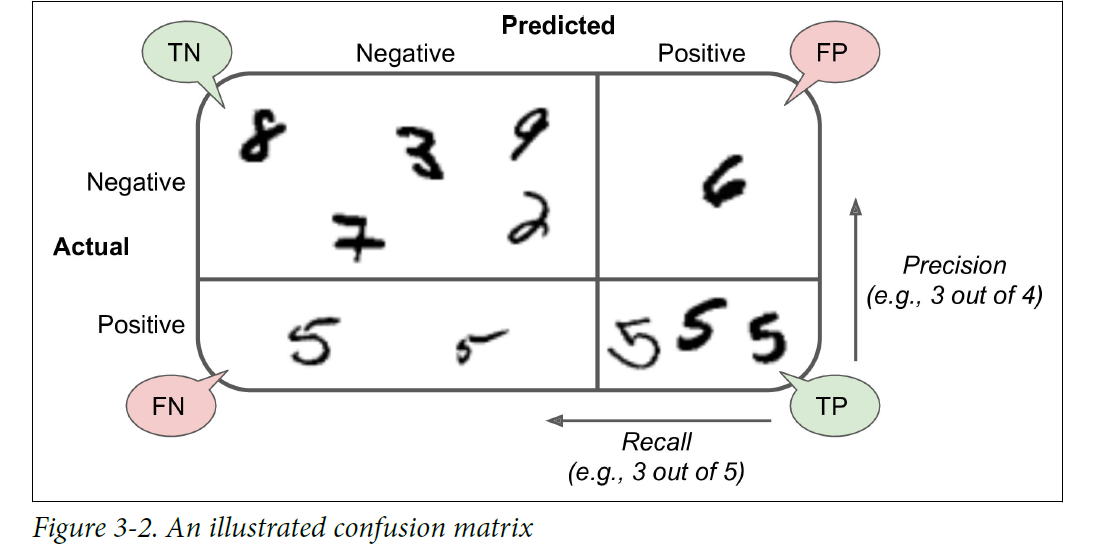

To compute the confunsion_matrix, we first need to have a set of predictions. Count the number of times intance A is classified as B

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Rather than returning the scores (cross_val_score()), cross_val_predict() returns the predictions made on each test fold.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

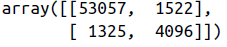

Each row in a confusion matrix represents an _actual class_, while each column represents a _predicted class_. In this example, the first row represents the no-5 class: 53,057 of them were clasffied correclty (true negatives), while 1522 were not (false positives). The second row considers the 5 class: 4096 were correctly classified (true positives) and 1325 were wrongly classified as no-5 (false negatives).

The confusion matrix gives a lot of information, but we need to use a more concise metric.

### Precision and Recall

We can see precision as a measure of <b>quality</b>, however, having a good precision alone does not reflect on <b>quantity</b>. For that, we need recall

$$
  precision = \frac{TP}{TP + FP}
$$

Recall is also called sensitivity, or _True Positive Rate_ (TPR)

$$
  recall = \frac{TP}{TP + FN}
$$


In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)


It is often convenient to combine precision and recall into a single metric called _F1 score_, specially if want a simple way to compare two classifiers. <b>F1 is the harmonic mean of precision and recall</b>. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. Thus, a classifier only get a high F1 score when both recall and precision are high.

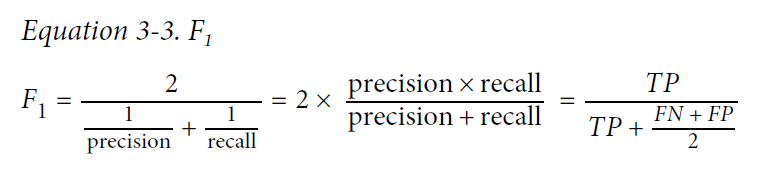

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

F1 favors classifiers that have similar precision and recall. This is not necessarily always wanted: sometimes you care more about precision, and sometimes more about recall &rarr; _precision/recall tradeoff_

### Precision/Recall Tradeoff

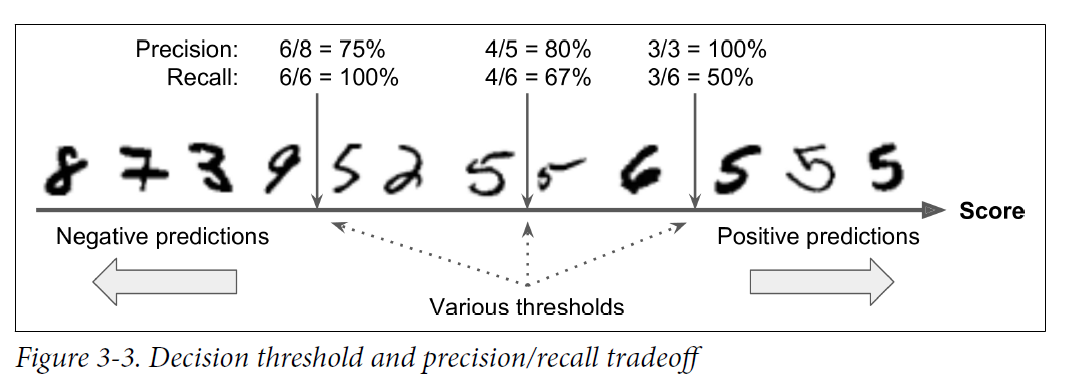

### How to select the threshold for precision/recall? &rarr; decision function

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

Now with the scores, we compute precision and recall for all possible threshold using _precision\_recall\_curve()_ function

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold, add the legend, axis label and grid
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

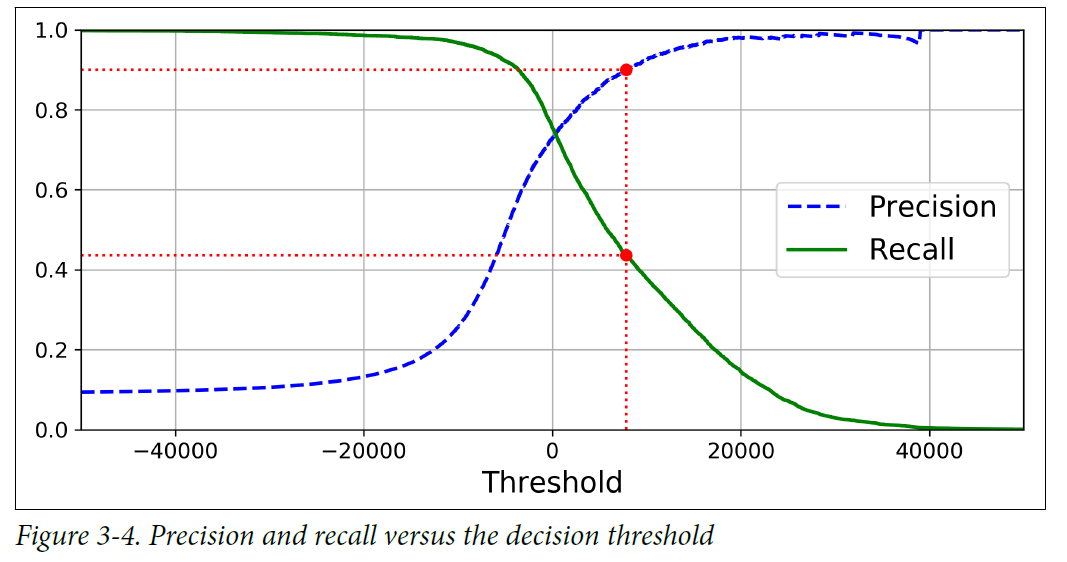

### Plotting Precision against Recall

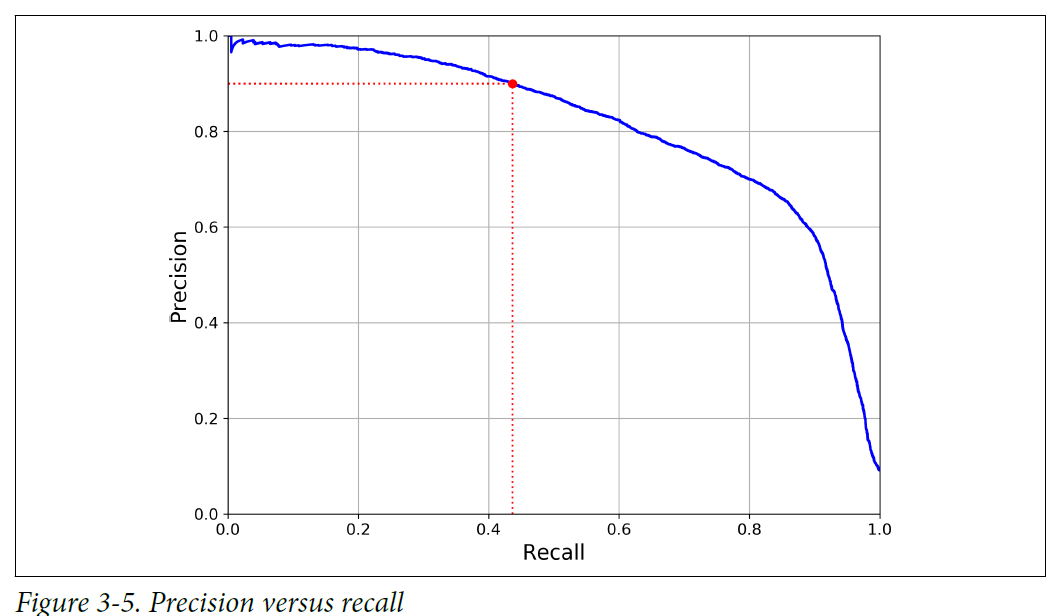

If someone says "let’s reach 99% precision!", we should ask, "at what recall?"

## The ROC Curve

The receiver operating characteristic (ROC) curve is another tool used with binary classifiers. It is very similar to the Precision/Recall curve, but instead of plotting precision x recall, it plots _True Positive Rate_ (recall) against _False Positive Rate_. 

FPR is the ratio of negative instances that are incorrectly classified. It is equal to one minus true negative rate (TNR). <b>TNR is also called _specificity_. Hence, the ROC curve plots _sensitivity_ (recall) versus 1 - _specificity_
    
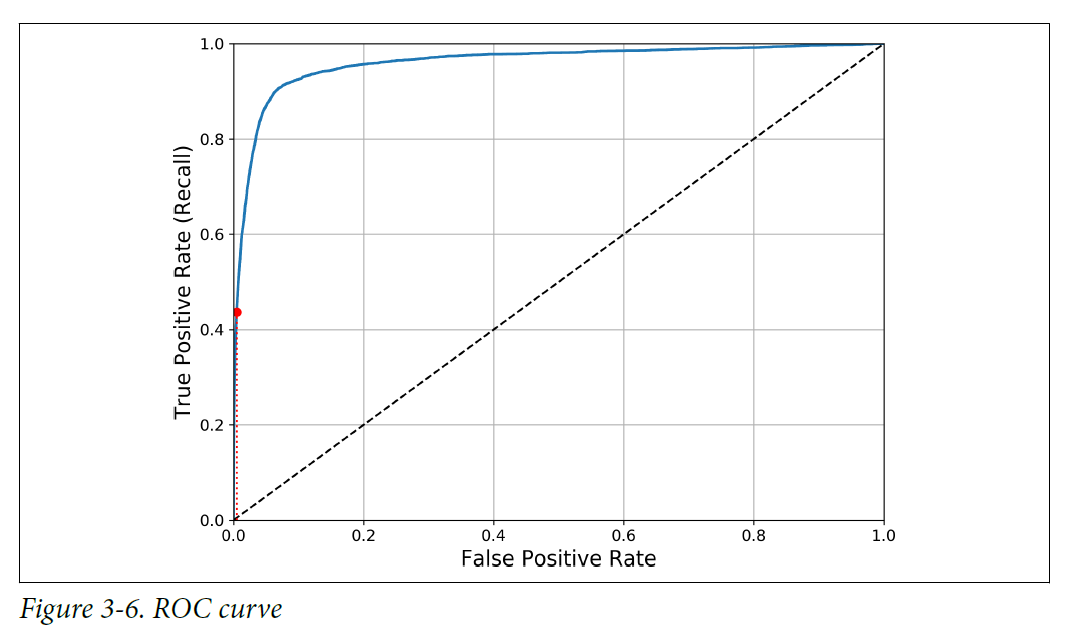

We can see again a tradeoff: a higher true positive rate (recall) will increase the false positive rate. The dotted line represents the ROC curve of a purely random classifier. <b>A good classifier stays as far away from the line as possible.</b>

One way to compare classifiers is to measure the _Area Under the Curve_ (AUC)

In [ ]:
from sklearn.metrics import roc_auc_score


roc_auc_score(y_train_5, y_scores)

#### Choosing between ROC And P/R curve

Typically, whenever the positive rate is rare or when we care more about false positives than the false negatives &rarr; P/R

Otherwise, ROC curve.


---

# Multiclass Classification

_multiclass classifiers_ can distinguish between more than two classes.

Some algorithms, like Random Forest classifiers or naive Bayes classifiers can handle multiple classes directly. Others, such as SVM or linear classifiers, are strictly binary classifiers. 

There are many strategies to perform multiclass classification using multiple binary classifiers.

* one-versus-all (OvA) - multiple binary classifiers, one for each class, then when you want to classifiy a new instance, get the decision score from each classifier and select the class whose classifier outputs the highest score.

* One binary classifier for every pair of classes: one-versus-one (OvO)


Scikit-Learn does it automatically!



In [ ]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5

sgd_clf.predict([some_digit])


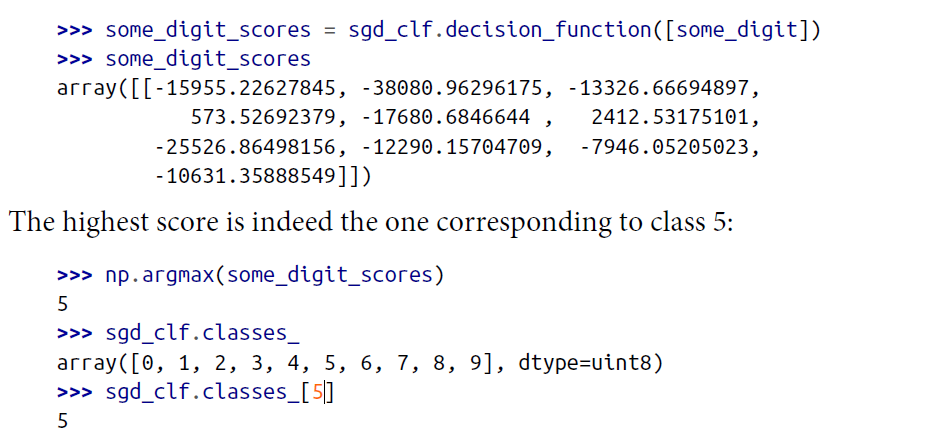


When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value.

##  Error Analysis

Once you found a promising model, you want to find ways to improve it. One way is to analyze the type of errors it makes.

First, you can look at the confusion matrix.

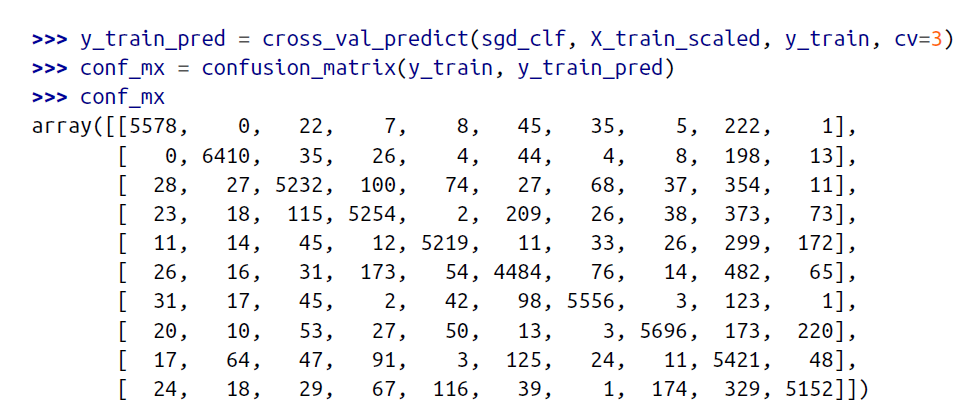

For a multiclass, it my be better to use matplotlib matshow()

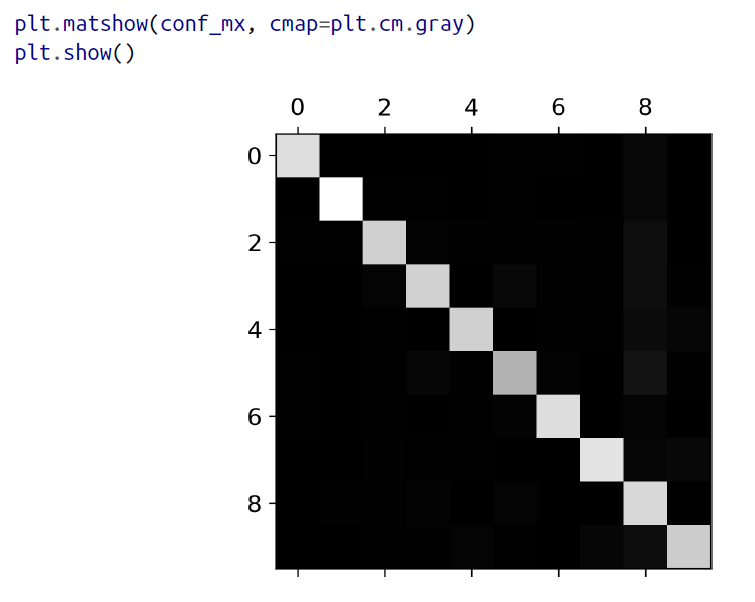



# Multilabel Classification

We might want to classify an instance into multiple classes. (for instnace, face-recognition classifier: recognize several people). These type of systems that output multiple binary tags are called _multilabel classification system_

# Multioutput Classification

_multiputout-multiclass classification_ its a generalzation of the multilable classification, where each label can be multiclass